# Testing `pylibs`


In [1]:
import testutils as u
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Generating Test Spectrum: Copper-Tin

Generate the spectrum with 70% copper and 30% tin at 1 eV temperature, 1e+17 electron density.

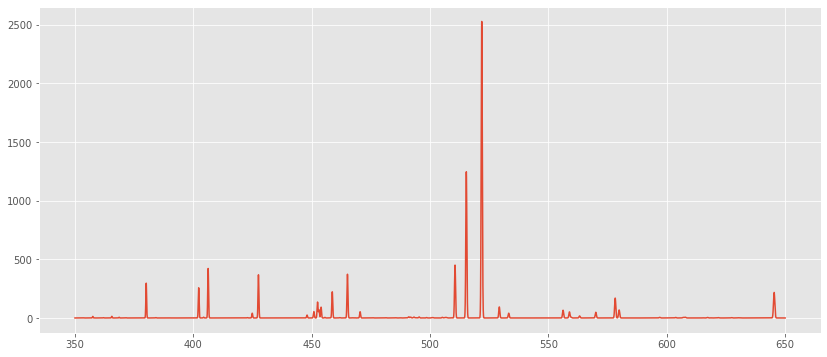

In [2]:
p = u.testPlasma_CuSn() # plasma with default settings

plt.figure(figsize = [14, 6])
y = p.computeSpectrum(350., 650., 1000)
plt.plot(y.c('lambda'), y.c('sum'))
plt.show()

## Testing the Analysis Module

In [3]:
# reference lines 
ref = {
        510.554 : 'cu-1',
        515.324 : 'cu-1',
        521.820 : 'cu-1',
        380.1011: 'sn-1',
        452.4734: 'sn-1', 
        533.2339: 'sn-2', 
        556.1910: 'sn-2', 
        558.8815: 'sn-2', 
        579.8860: 'sn-2', 
        645.3542: 'sn-2', 
        684.4186: 'sn-2',
    }

In [4]:
s = u.testSpectrum_CuSn() # spctrum with default settings


# create an analyser object:
q = u.QAnalyser(s, list(s.attrs['plasma'].comp.keys()))
q.setReferenceLines(ref)

q.searchPeaks(match = True, dist_ub = 1.)


In [5]:

linetab = q._lines # table of matched lines
linetab.print()


           elem         sp     lambda        Aki         Ek         gk    lambda0        int      width
     ========== ========== ========== ========== ========== ========== ========== ========== ==========
[ 0]         Cu          1        511      2e+06       3.82          4        511        451       1.02
[ 1]         Cu          1        515      6e+07       6.19          4        515   1.25e+03       1.03
[ 2]         Cu          1        522    7.5e+07       6.19          6        522   2.59e+03       1.05
[ 3]         Sn          1        380    2.8e+07       4.33          3        380        297       0.76
[ 4]         Sn          1        452    2.6e+07       4.87          3        453        154       1.46
[ 5]         Sn          2        533    9.9e+07       11.2          4        533       40.7       1.07
[ 6]         Sn          2        556   1.13e+08       11.2          6        556       65.9       1.11
[ 7]         Sn          2        559    7.8e+07       11.1    

In [5]:

q.makeBoltzPlane(1., 1.e+17, fmt = 'saha') # make saha-boltz. plane

b = q.getBoltzPlane() # get the saha-boltz. plane object


In [14]:

t = b.getPoints()
t.print() # print boltz-coordinates 



           elem         sp          x          y
     ========== ========== ========== ==========
[ 0]         Cu          1       3.82      -9.78
[ 1]         Cu          1       6.19      -12.2
[ 2]         Cu          1       6.19      -12.1
[ 3]         Sn          1       4.33      -12.6
[ 4]         Sn          1       4.87      -13.1
[ 5]         Sn          2       25.8      -27.1
[ 6]         Sn          2       25.8      -27.2
[ 7]         Sn          2       25.7        -27
[ 8]         Sn          2       25.7        -27
[ 9]         Sn          2       23.6      -25.1


In [16]:

b.getLineParam().print() # fit line to points

b.estimateTe('cu') # find tempereture (use cu)
print(f"\nTe (from Cu): ({b.Te} \u00b1 {b.Te_err}) eV")


          elem         Te      const     err_Te   err_cons
    ========== ========== ========== ========== ==========
[0]         Cu       1.02      -6.04     0.0392      0.208
[1]         Sn        1.5      -9.75      0.021      0.202

Te (from Cu): (1.0181163182753734 ± 0.03915599170186433) eV


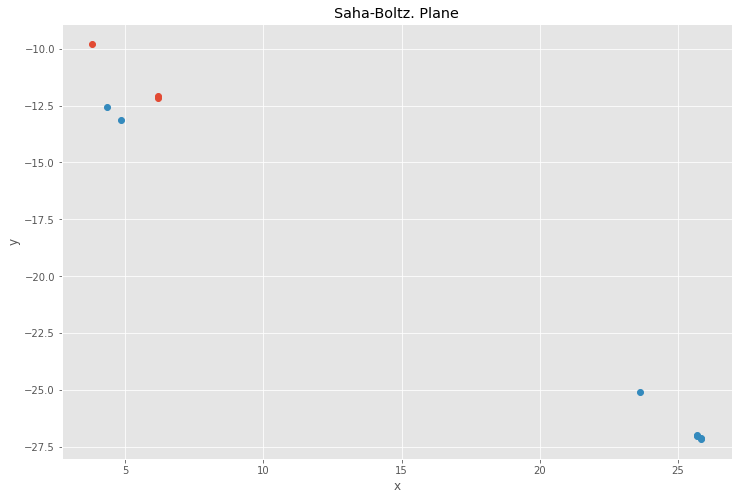

In [15]:
# saha-boltz. plane

plt.figure(figsize = [12, 8])
sp = ... 
for elem in q._elem_idx.keys():
    t = b.getPoints(elem, sp)
    plt.plot(t.c('x'), t.c('y'), 'o')
plt.xlabel("x"); plt.ylabel("y"); plt.title("Saha-Boltz. Plane")
plt.show()